# AdaBoost (Adaptive Boosting)

## 1. Why Boosting Exists (Big Picture)

Most **simple models** (called *weak learners*) perform only slightly better than random guessing.

Boosting answers one question:

> How can we convert many weak models into one strong model?

AdaBoost is the **first practical boosting algorithm**.

---

## 2. Weak Learner Definition

A **weak learner** satisfies:

$$
Accuracy > 0.5
$$

Common choice:
- Decision Stump (depth = 1)

---

## 3. Classification Setup

Binary labels:

$$
y_i \in \{-1, +1\}
$$

Initial weights:

$$
w_i^{(1)} = \frac{1}{N}
$$

---

## 4. AdaBoost Core Algorithm

Repeat for $t = 1 \dots T$:

1. Train weak learner on weighted data
2. Compute error
3. Assign model weight
4. Update sample weights

---

## 5. Error Calculation

$$
\varepsilon_t = \sum_{i=1}^{N} w_i^{(t)} \cdot \mathbf{1}(y_i \neq h_t(x_i))
$$

---

## 6. Model Weight (Alpha)

$$
\alpha_t = \frac{1}{2} \ln\left( \frac{1 - \varepsilon_t}{\varepsilon_t} \right)
$$

Lower error ⇒ higher influence.

---

## 7. Weight Update Rule

$$
w_i^{(t+1)} = w_i^{(t)} e^{-\alpha_t y_i h_t(x_i)}
$$

Normalize weights.

---

## 8. Final Prediction

$$
H(x) = \text{sign}\left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
$$

---

## 9. Overfitting Risk

AdaBoost aggressively focuses on misclassified points → sensitive to noise.

---

## 10. Comparison with Random Forest

| Property | Random Forest | AdaBoost |
|--------|---------------|---------|
| Training | Parallel | Sequential |
| Weights | Equal | Learned |
| Noise | Robust | Sensitive |

---

## 11. Interview Summary

- Sequential boosting
- Exponential reweighting
- Weighted voting
- Bias reduction focus

---

## 12. Takeaway

AdaBoost is **error-driven learning**, not randomness.


# AdaBoost – Step by Step (Worked Numerical Example)

This note explains **AdaBoost** completely using a **small numerical dataset**,
exactly matching the logic shown in the whiteboard images.

The goal is clarity: **what happens, why it happens, and how the math works**.

---

## 1. Dataset Setup

We start with a small dataset of **5 samples**.

| Index | $x_1$ | $x_2$ | $y$ |
|------:|------:|------:|----:|
| 1 | 3 | 7 | 1 |
| 2 | 2 | 9 | 0 |
| 3 | 1 | 4 | 1 |
| 4 | 9 | 8 | 0 |
| 5 | 3 | 0 | 0 |

Number of samples:
$$
n = 5
$$

---

## 2. Initial Weights

AdaBoost starts by assigning **equal weight** to every data point.

$$
w_i = \frac{1}{n} = \frac{1}{5} = 0.2
$$

| Index | Weight |
|------:|-------:|
| 1 | 0.2 |
| 2 | 0.2 |
| 3 | 0.2 |
| 4 | 0.2 |
| 5 | 0.2 |

---

## 3. Train Weak Learner $M_1$ (Decision Stump)

We train a **decision stump** (depth = 1 tree).  
Assume it makes **one mistake** (as shown on the board).

Let the misclassified point be index **3**.

---

## 4. Weighted Error

Weighted error is the **sum of weights of misclassified points**.

$$
\text{Error}_1 = \sum w_i \;[\text{misclassified}]
$$

Here:
$$
\text{Error}_1 = 0.2
$$

---

## 5. Compute Model Weight $\alpha_1$

AdaBoost assigns a weight to the model:

$$
\alpha_1 = \frac{1}{2} \ln \left( \frac{1 - \text{Error}_1}{\text{Error}_1} \right)
$$

Substitute:

$$
\alpha_1 = \frac{1}{2} \ln \left( \frac{1 - 0.2}{0.2} \right)
= \frac{1}{2} \ln(4)
\approx 0.69
$$

> Smaller error $\Rightarrow$ larger $\alpha$  
> Better model $\Rightarrow$ more influence

---

## 6. Update Sample Weights

### Rule

- **Correctly classified**:
$$
w_i' = w_i \cdot e^{-\alpha_1}
$$

- **Misclassified**:
$$
w_i' = w_i \cdot e^{+\alpha_1}
$$

---

### Apply Updates

| Index | Old $w$ | Correct? | New (unnormalized) |
|------:|--------:|---------:|-------------------:|
| 1 | 0.2 | ✔ | $0.2 e^{-0.69} \approx 0.1$ |
| 2 | 0.2 | ✔ | $0.1$ |
| 3 | 0.2 | ✘ | $0.2 e^{0.69} \approx 0.4$ |
| 4 | 0.2 | ✔ | $0.1$ |
| 5 | 0.2 | ✔ | $0.1$ |

Sum:
$$
Z = 0.1 + 0.1 + 0.4 + 0.1 + 0.1 = 0.8
$$

---

## 7. Normalize Weights

$$
w_i^{(new)} = \frac{w_i'}{Z}
$$

| Index | Final Weight |
|------:|-------------:|
| 1 | $0.1 / 0.8 = 0.125$ |
| 2 | $0.125$ |
| 3 | $0.4 / 0.8 = 0.5$ |
| 4 | $0.125$ |
| 5 | $0.125$ |

✅ Misclassified point now dominates learning.

---

## 8. Weighted Resampling (Bootstrap)

We form cumulative ranges:

| Index | Weight | Range |
|------:|-------:|------:|
| 1 | 0.125 | 0.000 – 0.125 |
| 2 | 0.125 | 0.125 – 0.250 |
| 3 | 0.500 | 0.250 – 0.750 |
| 4 | 0.125 | 0.750 – 0.875 |
| 5 | 0.125 | 0.875 – 1.000 |

Generate random numbers in $[0,1]$.  
Points falling in **larger ranges** are selected more often.

➡ Sample 3 will appear multiple times in the next dataset.

---

## 9. Train Next Model $M_2$

- New dataset is biased toward hard points
- Another stump is trained
- New $\alpha_2$ is computed
- Process repeats

---

## 10. Final Prediction Formula

For a new point $x$:

$$
\text{Final Prediction}
= \text{sign} \left( \sum_{t=1}^{T} \alpha_t \, h_t(x) \right)
$$

Each weak learner votes,  
but **stronger learners vote louder**.

---

## 11. Key Intuition (Interview-Ready)

- AdaBoost focuses on **mistakes**
- Bad models get **low weight**
- Good models get **high weight**
- Hard points get **re-sampled more**
- Final model is a **weighted committee**

---

## 12. When AdaBoost Fails

- Very noisy datasets
- Many outliers
- Weak learners overfit

---

## Summary

AdaBoost works by:
1. Starting equal
2. Punishing mistakes
3. Rewarding good learners
4. Repeating until convergence

This example is the **exact mathematical backbone** behind all AdaBoost libraries.


In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

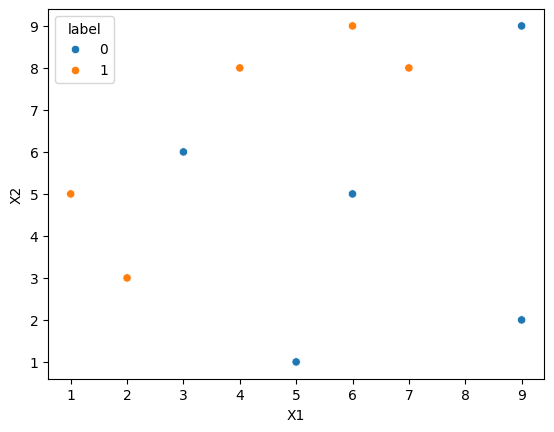

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [7]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [9]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

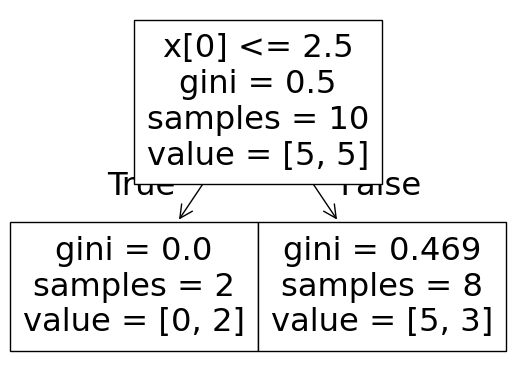

In [10]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

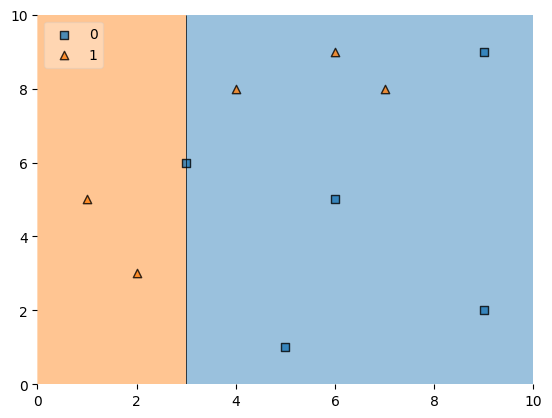

In [11]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [12]:
df['y_pred'] = dt1.predict(X)

In [13]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [14]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [15]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [16]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [17]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [18]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [19]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [20]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [21]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [22]:
df['nomalized_weights'].sum()

np.float64(1.0)

In [23]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [24]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [25]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [27]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [28]:
index_values = create_new_dataset(df)

index_values

[2, 7, 8, 0, 9, 5, 3, 5, 0, 5]

In [29]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [30]:
second_df

,X1,X2,label,weights
2,3,6,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1


In [31]:
dt2 = DecisionTreeClassifier(max_depth=1)


X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [32]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.5, '  False')]

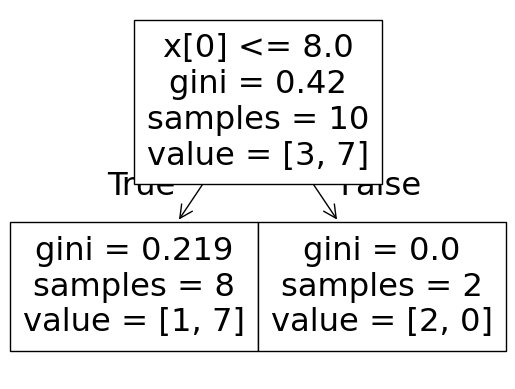

In [33]:
plot_tree(dt2)

<Axes: >

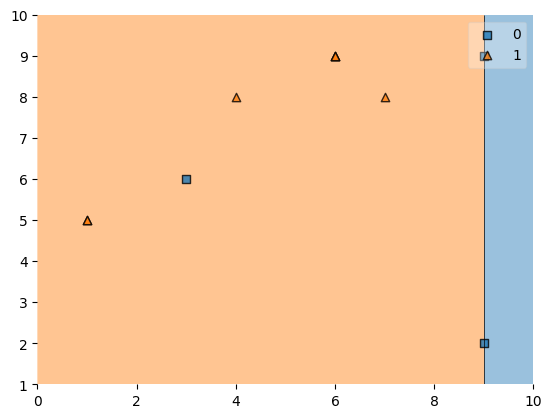

In [36]:
plot_decision_regions(X, y, clf=dt2, legend=1)

In [37]:
second_df['y_pred'] = dt2.predict(X)


second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
9,9,2,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,1
5,6,9,1,0.1,1


In [39]:
alpha2 = calculate_model_weight(0.1)
alpha2

np.float64(1.0986122886681098)

In [40]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)


second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [41]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,1,0.297427
7,7,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622


In [42]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,1,0.297427,0.495694
7,7,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034


In [43]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [44]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,1,0.495694,0.000000,0.495694
7,7,8,1,0.1,1,0.056034,0.495694,0.551728
8,9,9,0,0.1,0,0.056034,0.551728,0.607762
0,1,5,1,0.1,1,0.056034,0.607762,0.663796
9,9,2,0,0.1,0,0.056034,0.663796,0.719830
5,6,9,1,0.1,1,0.056034,0.719830,0.775864
3,4,8,1,0.1,1,0.056034,0.775864,0.831898
5,6,9,1,0.1,1,0.056034,0.831898,0.887932
0,1,5,1,0.1,1,0.056034,0.887932,0.943966
5,6,9,1,0.1,1,0.056034,0.943966,1.000000


In [45]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1


In [46]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [47]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

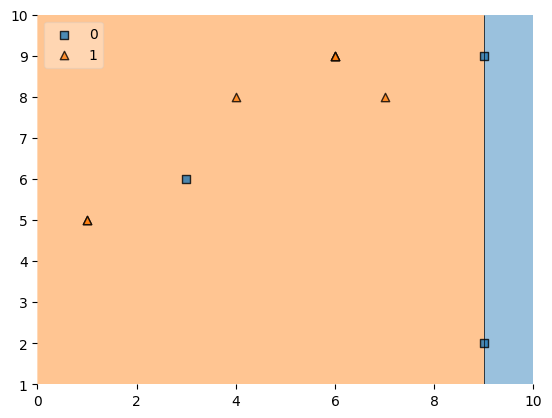

In [48]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [49]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
8,9,9,0,0.1,1
5,6,9,1,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,1


In [50]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [51]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Prediction

In [52]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [53]:
dt2.predict(query)

array([1])

In [54]:
dt3.predict(query)

array([1])

In [55]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [56]:
np.sign(1.09)

np.float64(1.0)

In [57]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [58]:
dt2.predict(query)

array([0])

In [59]:
dt3.predict(query)

array([0])

In [60]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [61]:
np.sign(-0.25)

np.float64(-1.0)